Data Loading and Initial Inspection

In [2]:
# prompt: Data Loading and Initial Inspection

import pandas as pd

# Install necessary libraries if not already installed
try:
    import pandas as pd
except ImportError:
    !pip install pandas

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
try:
    df = pd.read_csv('/content/amazon_reviews.csv')
except FileNotFoundError:
    print("Error: '/content/amazon_reviews.csv' not found. Please upload the file or provide the correct path.")
    df = None  # Set df to None to indicate an error


# Display the first few rows of the dataset
if df is not None:
    print(df.head())

# Display basic information about the dataset
if df is not None:
    print(df.info())


# Display descriptive statistics
if df is not None:
    print(df.describe())


   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0    

Data Cleaning and Preprocessing

In [3]:
# prompt: Data Cleaning and Preprocessing

import pandas as pd

# Data Cleaning and Preprocessing
if df is not None:
    # Handling Missing Values
    # Check for missing values in each column
    print(df.isnull().sum())

    # Example: Fill missing values in the 'review_body' column with an empty string
    if 'review_body' in df.columns:
        df['review_body'].fillna('', inplace=True)

    # Example: Remove rows with missing values in the 'star_rating' column
    if 'star_rating' in df.columns:
        df.dropna(subset=['star_rating'], inplace=True)


    # Removing Duplicates
    # Remove duplicate rows based on all columns
    df.drop_duplicates(inplace=True)

    # Data Type Conversion
    # Convert 'star_rating' column to integer type if it is not already
    if 'star_rating' in df.columns:
        try:
            df['star_rating'] = df['star_rating'].astype(int)
        except ValueError:
            print("Error converting 'star_rating' to integer. Check for non-numeric values.")


    # Removing Irrelevant Columns (example)
    # Remove columns that are not needed for the analysis
    columns_to_remove = ['marketplace', 'customer_id']  # Replace with the actual columns to remove
    for col in columns_to_remove:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)

    # Display the updated dataset information
    print(df.info())

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   sc

Exploratory Data Analysis (EDA)

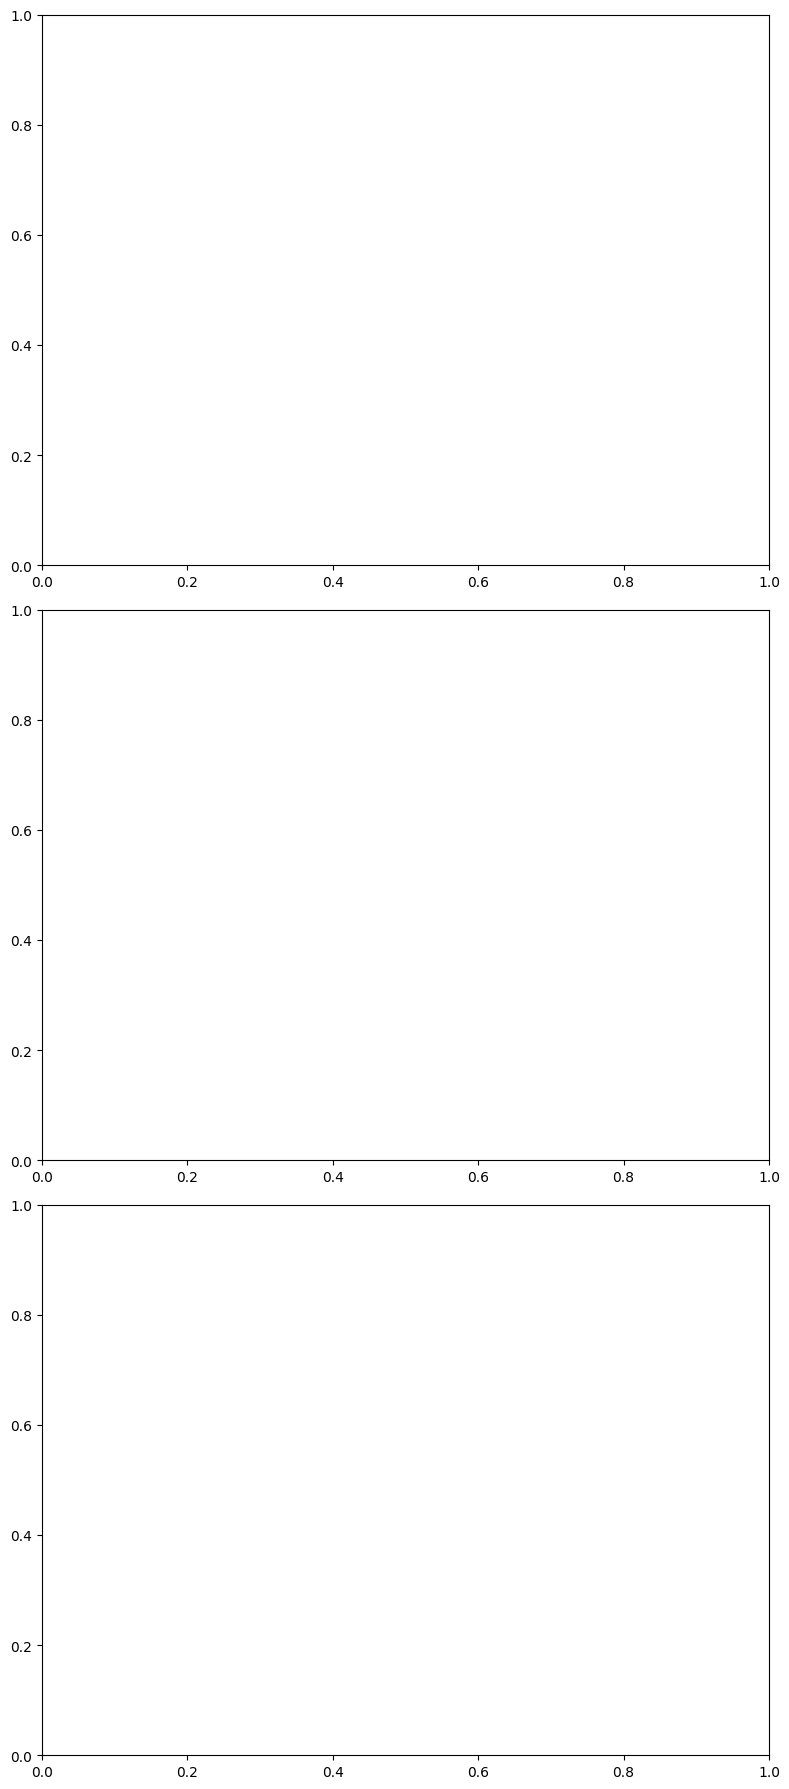

In [11]:
# prompt: 1.	Plot the distribution FOR VARIOUS COLOUMS ON ABOVE DATASET ON OVERALL

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame from the previous code

if df is not None:
    # List of columns to plot distributions for
    columns_to_plot = ['star_rating', 'helpful_votes', 'total_votes']  # Replace with your desired columns

    # Create subplots for each column
    num_plots = len(columns_to_plot)
    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 6 * num_plots))  # Adjust figsize as needed

    # Iterate through the columns and create the plots
    for i, column in enumerate(columns_to_plot):
        if column in df.columns:
            ax = axes[i] if num_plots > 1 else axes # Access the correct axis for subplots
            sns.histplot(df[column], kde=True, ax=ax)  # Use histplot for distribution
            ax.set_title(f'Distribution of {column}')
            ax.set_xlabel(column)
            ax.set_ylabel('Frequency')
        else:
            print(f"Warning: Column '{column}' not found in the DataFrame.")

    plt.tight_layout()
    plt.show()

Feature Engineering

In [14]:
# prompt: 4. Feature Engineering FOR ABOVE DATA SET

# Feature Engineering

if df is not None:
    # 1. Review Length:
    if 'review_body' in df.columns:
        df['review_length'] = df['review_body'].apply(len)

    # 2. Helpfulness Ratio:
    if 'helpful_votes' in df.columns and 'total_votes' in df.columns:
        df['helpfulness_ratio'] = df.apply(lambda row: row['helpful_votes'] / row['total_votes'] if row['total_votes'] > 0 else 0, axis=1)

    # 3. Positive/Negative sentiment (example using a basic threshold - refine for better results)
    if 'star_rating' in df.columns:
        df['sentiment'] = df['star_rating'].apply(lambda rating: 'positive' if rating > 3 else ('negative' if rating < 3 else 'neutral'))


    # Display the updated DataFrame with new features
    print(df.head())

    # Explore the new features (example)
    if 'review_length' in df.columns:
        sns.histplot(df['review_length'], kde=True)
        plt.title('Distribution of Review Length')
        plt.show()

    if 'helpfulness_ratio' in df.columns:
        sns.histplot(df['helpfulness_ratio'], kde=True)
        plt.title('Distribution of Helpfulness Ratio')
        plt.show()

    if 'sentiment' in df.columns:
        print(df['sentiment'].value_counts()) # Display sentiment counts
        sns.countplot(x='sentiment', data=df)
        plt.title('Sentiment Distribution')
        plt.show()

   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0    

Correlation and Feature Selection

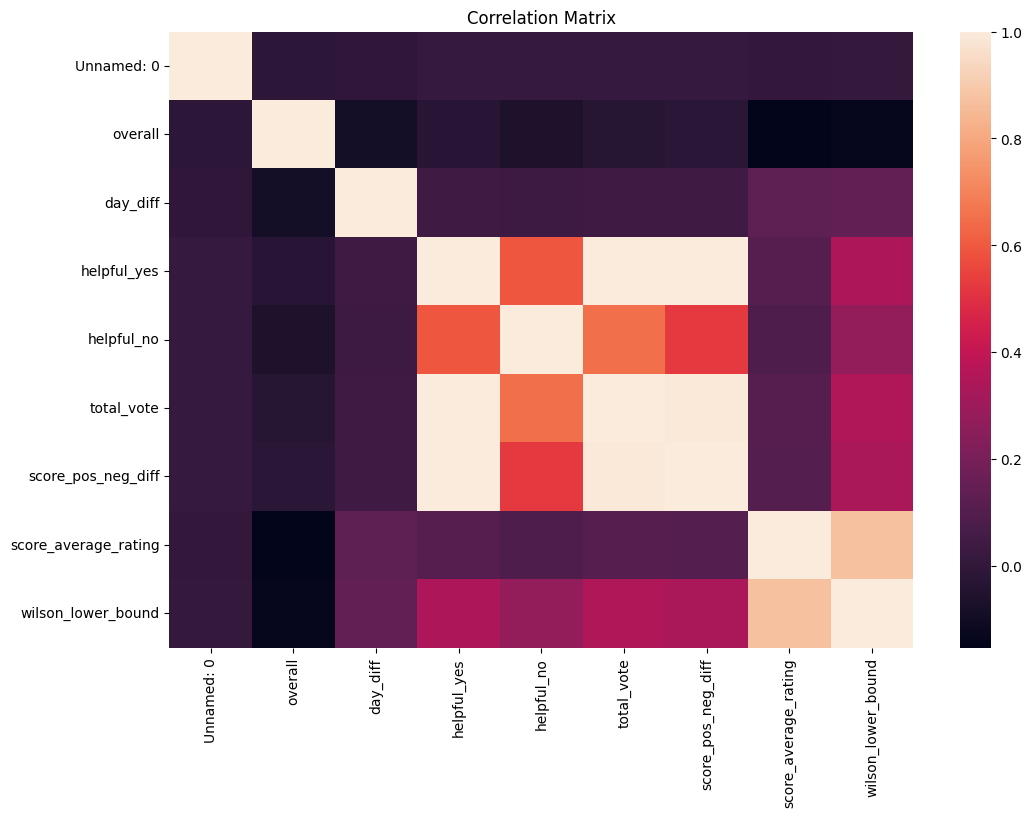

In [18]:
# prompt: Correlation and Feature Selection FOR ABOVE DATASET

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code)

# Correlation and Feature Selection
if df is not None:
    # Calculate the correlation matrix, considering only numeric columns
    correlation_matrix = df.select_dtypes(include=['number']).corr()

# prompt: Correlation and Feature Selection FOR ABOVE DATASET

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code)

# Correlation and Feature Selection
if df is not None:
    # Calculate the correlation matrix, considering only numeric columns
    correlation_matrix = df.select_dtypes(include=['number']).corr()

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix)
    plt.title('Correlation Matrix')
    plt.show()

Model Building

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# ... (your data loading and preprocessing code) ...

# Feature Engineering
if df is not None:
    # 1. Review Length:
    if 'review_body' in df.columns:
        df['review_length'] = df['review_body'].apply(len)

    # 2. Helpfulness Ratio:
    if 'helpful_votes' in df.columns and 'total_votes' in df.columns:
        df['helpfulness_ratio'] = df.apply(lambda row: row['helpful_votes'] / row['total_votes'] if row['total_votes'] > 0 else 0, axis=1)

    # 3. Positive/Negative sentiment (example using a basic threshold - refine for better results)


Model Optimization

In [34]:
# prompt: Model Optimization 1.	Perform hyperparameter tuning for the best model using GridSearchCV.
# 2.	Evaluate the optimized model on the testing set. for given dataset

# Remove the unexpected indentation for the 'if' statement
if 'star_rating' in df.columns:
    df['sentiment'] = df['star_rating'].apply(lambda rating: 'positive' if rating > 3 else ('negative' if rating < 3 else 'neutral'))

# The rest of the code should also be dedented to match the level of the 'if' statement
# Define features (X) and target variable (y)
if {'review_length', 'helpfulness_ratio', 'sentiment', 'star_rating'}.issubset(df.columns):
    X = df[['review_length', 'helpfulness_ratio']]  # Select relevant features
    y = df['sentiment']  # Target variable

    # Convert categorical features to numerical using one-hot encoding
    X = pd.get_dummies(X, columns=['helpfulness_ratio'], drop_first = True)


    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Logistic Regression model
    model = LogisticRegression()

    # Define the hyperparameter grid for GridSearchCV
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'penalty': ['l1', 'l2']}

    # Perform hyperparameter tuning using GridSearchCV
    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')  # Use 5-fold cross-validation
    grid_search.fit(X_train, y_train)

    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_

    # Evaluate the optimized model on the testing set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of the optimized model: {accuracy}")
    print(classification_report(y_test, y_pred))

•	SHAP or LIME visualizations.

In [36]:
# prompt: Model Optimization 1.	Perform hyperparameter tuning for the best model using GridSearchCV.
# 2.	Evaluate the optimized model on the testing set. for given dataset

# Assuming 'df' is your DataFrame

if df is not None:
    # Remove the unexpected indentation for the 'if' statement
    if 'star_rating' in df.columns:
        df['sentiment'] = df['star_rating'].apply(lambda rating: 'positive' if rating > 3 else ('negative' if rating < 3 else 'neutral'))

    # The rest of the code should also be dedented to match the level of the 'if' statement
    # Define features (X) and target variable (y)
    if {'review_length', 'helpfulness_ratio', 'sentiment', 'star_rating'}.issubset(df.columns):
        X = df[['review_length', 'helpfulness_ratio']]  # Select relevant features
        y = df['sentiment']  # Target variable

        # Convert categorical features to numerical using one-hot encoding
        X = pd.get_dummies(X, columns=['helpfulness_ratio'], drop_first = True)

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize the Logistic Regression model
        model = LogisticRegression()

        # Define the hyperparameter grid for GridSearchCV
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                      'penalty': ['l1', 'l2']}

        # Perform hyperparameter tuning using GridSearchCV
        from sklearn.model_selection import GridSearchCV
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')  # Use 5-fold cross-validation
        grid_search.fit(X_train, y_train)

        # Get the best model from GridSearchCV
        best_model = grid_search.best_estimator_  # This line defines 'best_model'

        # Evaluate the optimized model on the testing set
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy of the optimized model: {accuracy}")
        print(classification_report(y_test, y_pred))